In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import imblearn

## Logistic Regression without changing anything.

In [2]:
df=pd.read_csv("./balance_scale.csv")

In [3]:
df

,leftweight,leftdistance,rightweight,rightdistance,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R
...,...,...,...,...,...
620,5,5,5,1,L
621,5,5,5,2,L
622,5,5,5,3,L
623,5,5,5,4,L


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
data_Tr, data_Te, target_Tr, target_Te = train_test_split(df.iloc[:,0:3], df["class"]
                                 , random_state=0
                                 , train_size=0.75)

In [11]:
lr=LogisticRegression()
lr.fit(data_Tr,target_Tr)

LogisticRegression()

In [15]:
result=lr.predict(data_Te)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [16]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.         0.83333333 0.74683544]
A = 0.7898089171974523
P = [0.         0.8125     0.85507246]
F1 = [0.         0.82278481 0.7972973 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


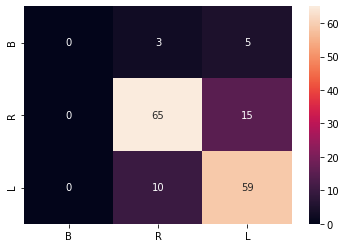

In [28]:
conf= confusion_matrix(target_Te, result)
sns.heatmap(conf, annot=True, xticklabels= df["class"].unique(),yticklabels= df["class"].unique())

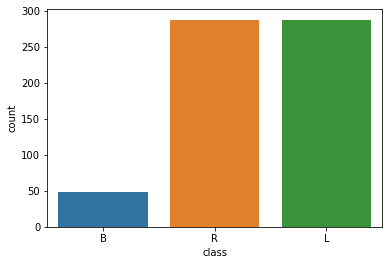

In [27]:
sns.countplot(df['class'])

<b> On remarque une grande disparité qui explique l'absence de prédiction B essayons d'équilibrer notre dataset</b>

## Resampling With smote.

<b> Notre jeu de donnée étant petit le réduire encore ne semble pas pertinent essayons donc de resample avec la fonction smote !</b>

In [30]:
from imblearn.over_sampling import SMOTE

In [33]:
smote= SMOTE("minority")

smoted_df, y = smote.fit_sample(df.iloc[:,:4],df['class'])

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [35]:
smoted_df['target']=y

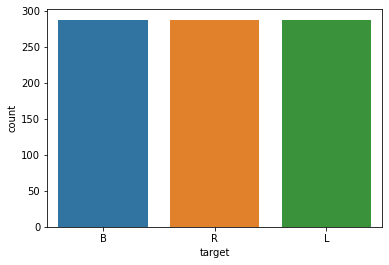

In [36]:
sns.countplot(smoted_df['target'])

<b> Nos données ont maintenant étaient équilibré recommençons notre modèle. </b>

In [37]:
data_Tr, data_Te, target_Tr, target_Te = train_test_split(smoted_df.iloc[:,0:3], smoted_df["target"]
                                 , random_state=0
                                 , train_size=0.75)

In [40]:
lr.fit(data_Tr,target_Tr)
result=lr.predict(data_Te)

In [41]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.52380952 0.65789474 0.58441558]
A = 0.5925925925925926
P = [0.40740741 0.70422535 0.703125  ]
F1 = [0.45833333 0.68027211 0.63829787]


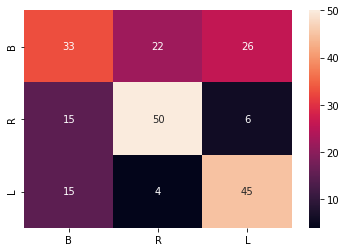

In [43]:
conf= confusion_matrix(target_Te, result)
sns.heatmap(conf, annot=True, xticklabels= df["class"].unique(),yticklabels= df["class"].unique())

<b> Bon on perd quand même beaucoup de précision sur deux de nos variables mais au moins la class B est prise en compte </b>

## Ressampling with Under_sampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler

In [45]:
rus = RandomUnderSampler()
X_reduce, y_rus = rus.fit_sample(df.iloc[:,:4],df['class'])
X_reduce['target']=y_rus

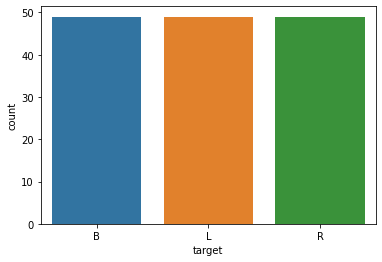

In [48]:
sns.countplot(X_reduce['target'])

In [49]:
data_Tr, data_Te, target_Tr, target_Te = train_test_split(X_reduce.iloc[:,0:3], X_reduce["target"]
                                 , random_state=0
                                 , train_size=0.75)

In [50]:
lr.fit(data_Tr,target_Tr)
result=lr.predict(data_Te)

In [51]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.4        0.66666667 0.35714286]
A = 0.5135135135135135
P = [0.13333333 0.92307692 0.55555556]
F1 = [0.2        0.77419355 0.43478261]


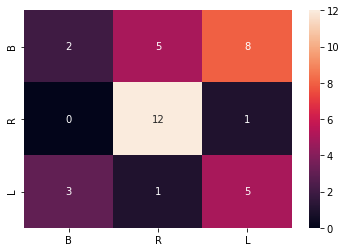

In [52]:
conf= confusion_matrix(target_Te, result)
sns.heatmap(conf, annot=True, xticklabels= df["class"].unique(),yticklabels= df["class"].unique())

<b> Comme on pouvait s'en douter c'est pas mieux ...</b>

## Ressample Mixte !

In [55]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek('auto')
X_smt, y_smt = smt.fit_sample(df.iloc[:,:4],df['class'])

X_smt['target']=y_smt

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


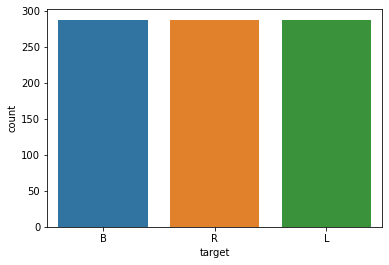

In [56]:
sns.countplot(X_smt['target'])

In [61]:
data_Tr, data_Te, target_Tr, target_Te = train_test_split(X_smt.iloc[:,0:3], X_smt["target"]
                                 , random_state=0
                                 , train_size=0.75)

In [62]:
lr.fit(data_Tr,target_Tr)
result=lr.predict(data_Te)

In [63]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.50943396 0.65882353 0.55128205]
A = 0.5833333333333334
P = [0.33333333 0.78873239 0.671875  ]
F1 = [0.40298507 0.71794872 0.6056338 ]


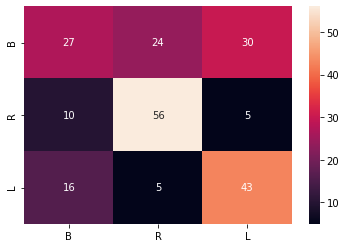

In [64]:
conf= confusion_matrix(target_Te, result)
sns.heatmap(conf, annot=True, xticklabels= df["class"].unique(),yticklabels= df["class"].unique())